<a href="https://colab.research.google.com/github/jakubros/NBA_players_value/blob/nba/NBAMAX_players_value.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importy

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

## Wczytanie danych z pliku csv

In [2]:
df = pd.read_csv('nbamax.csv', sep=';')

In [3]:
df

,Rk,Player,Pos_19,Age_19,Tm_19,G_19,GS_19,MP_19,FG_19,FGA_19,...,WS_22,WS/48_22,OBPM_22,DBPM_22,BPM_22,VORP_22,Salary_19,Salary_20,Salary_21,Salary_22
0,1,Steven Adams,C,26,OKC,63,63,26.7,4.5,7.6,...,3.4,0.144,-0.3,0.9,0.6,0.7,25842697,29592695,17073171,17926829
1,2,Bam Adebayo,PF,22,MIA,72,72,33.6,6.1,11.0,...,7.4,0.137,0.8,0.8,1.5,2.3,3454080,5115492,28103500,30351780
2,3,Nickeil Alexander-Walker,SG,21,NOP,47,1,12.6,2.1,5.7,...,1.1,0.062,-1.4,0.4,-0.9,0.2,2964840,3113160,3261480,5009633
3,4,Grayson Allen,SG,24,MEM,38,0,18.9,3.1,6.6,...,5.1,0.123,-0.6,0.7,0.1,1.0,2429400,2545320,4054695,8925000
4,5,Jarrett Allen,C,21,BRK,70,64,26.5,4.3,6.6,...,9.5,0.205,1.3,1.0,2.4,2.4,2376840,3909902,20000000,20000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,284,Delon Wright,PG,27,DAL,73,5,21.5,2.6,5.6,...,3.7,0.146,0.4,3.1,3.4,1.7,9473684,9000000,8526316,7804878
284,285,Thaddeus Young,PF,31,CHI,64,16,24.9,4.2,9.4,...,1.8,0.109,-1.8,1.9,0.1,0.4,12900000,13545000,14190000,8000000
285,286,Trae Young,PG,21,ATL,60,60,35.3,9.1,20.8,...,6.7,0.126,5.3,-2.0,3.3,3.4,6273000,6571800,8326471,37096500
286,287,Cody Zeller,C,27,CHO,58,39,23.1,4.3,8.3,...,0.7,0.147,-2.0,-0.7,-2.8,0.0,14471910,15415730,2389641,743922


In [4]:
df.describe()

,Rk,Age_19,G_19,GS_19,MP_19,FG_19,FGA_19,FG%_19,3P_19,3PA_19,...,WS_22,WS/48_22,OBPM_22,DBPM_22,BPM_22,VORP_22,Salary_19,Salary_20,Salary_21,Salary_22
count,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,...,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,2.880000e+02,2.880000e+02,2.880000e+02,2.880000e+02
mean,144.500000,25.118056,51.663194,28.184028,23.393403,4.104861,8.900347,0.464809,1.209028,3.384722,...,3.223958,0.098163,-0.572917,0.127083,-0.442708,0.902778,8.904954e+06,1.013258e+07,1.099044e+07,1.253046e+07
std,83.282651,3.891376,18.604290,25.824471,8.418872,2.337405,4.999488,0.083691,0.944776,2.460994,...,2.797775,0.067626,3.128763,1.323980,3.547755,1.432084,9.837946e+06,1.020072e+07,1.052096e+07,1.147646e+07
min,1.000000,19.000000,2.000000,0.000000,3.000000,0.000000,0.300000,0.000000,0.000000,0.000000,...,-0.200000,-0.378000,-22.500000,-9.800000,-22.600000,-1.100000,3.750000e+02,4.922200e+04,4.407100e+04,1.131140e+05
25%,72.750000,22.000000,43.750000,3.000000,17.600000,2.300000,4.975000,0.416750,0.475000,1.575000,...,1.075000,0.059000,-2.025000,-0.700000,-2.100000,0.000000,1.936680e+06,2.324455e+06,2.635718e+06,3.180650e+06
50%,144.500000,25.000000,58.000000,18.500000,24.550000,3.600000,7.850000,0.450000,1.100000,3.150000,...,2.500000,0.098000,-0.700000,0.100000,-0.600000,0.350000,4.463963e+06,5.629678e+06,7.175440e+06,8.922897e+06
75%,216.250000,27.250000,65.000000,56.000000,30.400000,5.500000,12.325000,0.490500,1.900000,4.900000,...,4.625000,0.141000,1.000000,0.800000,1.100000,1.400000,1.280759e+07,1.459593e+07,1.568166e+07,1.794512e+07
max,288.000000,39.000000,74.000000,73.000000,37.500000,10.900000,22.900000,0.742000,4.400000,12.400000,...,14.900000,0.308000,8.500000,4.500000,13.000000,8.800000,4.023176e+07,4.300636e+07,4.578097e+07,4.807001e+07


## Zmiana wartości z kolumny Pos, ze stringów na int

In [5]:
df['Pos_22'].unique()


array(['C', 'SG', 'PF', 'SF', 'PG', 'SG-PG', 'SF-SG', 'PG-SG', 'SF-PF'],
      dtype=object)

In [6]:
def zmien_wartosci(pos):
    if pos in ['C', 'C-PF']:
        return 5
    elif pos in ['PF', 'PF-C', 'PF-SF']:
        return 4
    elif pos in ['SF', 'SF-SG', 'SF-PF']:
        return 3
    elif pos in ['SG', 'SG-PG', 'SG-SF', 'SF-SG']:
        return 2
    elif pos in ['PG', 'PG-SG']:
        return 1

df['Pos_Num_19']=df['Pos_19'].apply(zmien_wartosci).astype(int)
df['Pos_Num_20']=df['Pos_20'].apply(zmien_wartosci).astype(int)
df['Pos_Num_21']=df['Pos_21'].apply(zmien_wartosci).astype(int)
df['Pos_Num_22']=df['Pos_22'].apply(zmien_wartosci).astype(int)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Columns: 202 entries, Rk to Pos_Num_22
dtypes: float64(172), int64(21), object(9)
memory usage: 454.6+ KB


## Dyskretyzacja danych o wieku zawodników

In [8]:
df['Age_new_19']=pd.cut(df['Age_19'],
                          bins=[18, 25, 32, 100],
                          labels = [1, 2, 3])
df['Age_new_20']=pd.cut(df['Age_20'],
                          bins=[18, 25, 32, 100],
                          labels = [1, 2, 3])
df['Age_new_21']=pd.cut(df['Age_21'],
                          bins=[18, 25, 32, 100],
                          labels = [1, 2, 3])
df['Age_new_22']=pd.cut(df['Age_22'],
                          bins=[18, 25, 32, 100],
                          labels = [1, 2, 3])


## Kategoryzacja drużyn

In [9]:
df['Tm_19'] = pd.factorize(df['Tm_19'])[0]
df['Tm_20'] = pd.factorize(df['Tm_20'])[0]
df['Tm_21'] = pd.factorize(df['Tm_21'])[0]
df['Tm_22'] = pd.factorize(df['Tm_22'])[0]

In [10]:
df['Tm_19'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

In [11]:
df.head()

,Rk,Player,Pos_19,Age_19,Tm_19,G_19,GS_19,MP_19,FG_19,FGA_19,...,Salary_21,Salary_22,Pos_Num_19,Pos_Num_20,Pos_Num_21,Pos_Num_22,Age_new_19,Age_new_20,Age_new_21,Age_new_22
0,1,Steven Adams,C,26,0,63,63,26.7,4.5,7.6,...,17073171,17926829,5,5,5,5,2,2,2,2
1,2,Bam Adebayo,PF,22,1,72,72,33.6,6.1,11.0,...,28103500,30351780,4,5,5,5,1,1,1,1
2,3,Nickeil Alexander-Walker,SG,21,2,47,1,12.6,2.1,5.7,...,3261480,5009633,2,2,2,2,1,1,1,1
3,4,Grayson Allen,SG,24,3,38,0,18.9,3.1,6.6,...,4054695,8925000,2,2,2,2,1,1,2,2
4,5,Jarrett Allen,C,21,4,70,64,26.5,4.3,6.6,...,20000000,20000000,5,5,5,5,1,1,1,1


## Heatmapa korelacji

In [12]:
heatmap_df = df.iloc[:, 5:49]

In [13]:
heatmap_df

,G_19,GS_19,MP_19,FG_19,FGA_19,FG%_19,3P_19,3PA_19,3P%_19,2P_19,...,BLK%_19,TOV%_19,USG%_19,OWS_19,DWS_19,WS_19,WS/48_19,OBPM_19,DBPM_19,BPM_19
0,63,63,26.7,4.5,7.6,0.592,0.0,0.0,0.333,4.5,...,3.4,14.2,17.3,3.8,2.7,6.5,0.185,1.9,1.1,2.9
1,72,72,33.6,6.1,11.0,0.557,0.0,0.2,0.143,6.1,...,3.8,17.6,21.2,4.6,3.9,8.5,0.168,1.4,2.0,3.4
2,47,1,12.6,2.1,5.7,0.368,1.0,2.8,0.346,1.1,...,1.1,16.1,23.3,-0.7,0.4,-0.2,-0.020,-3.2,-1.4,-4.6
3,38,0,18.9,3.1,6.6,0.466,1.5,3.7,0.404,1.6,...,0.2,10.9,17.6,0.8,0.4,1.2,0.082,-0.1,-1.2,-1.3
4,70,64,26.5,4.3,6.6,0.649,0.0,0.1,0.000,4.3,...,4.2,11.7,14.9,5.2,2.9,8.2,0.212,1.4,1.0,2.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,73,5,21.5,2.6,5.6,0.462,0.6,1.7,0.370,2.0,...,1.2,13.8,14.4,2.6,1.8,4.4,0.134,0.0,1.9,1.9
284,64,16,24.9,4.2,9.4,0.448,1.2,3.5,0.356,3.0,...,1.4,13.9,19.7,-0.2,2.1,1.9,0.058,-1.4,0.2,-1.2
285,60,60,35.3,9.1,20.8,0.437,3.4,9.5,0.361,5.7,...,0.3,16.2,34.9,5.3,0.6,5.9,0.133,6.2,-2.3,3.9
286,58,39,23.1,4.3,8.3,0.524,0.3,1.3,0.240,4.0,...,1.7,11.9,20.8,2.3,1.3,3.6,0.129,0.2,-0.8,-0.6


<ipython-input-14-5b838cc42b5b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(heatmap.drop({"Rk", "Player","Pos_19","Tm_19"}, axis=1).iloc[:,5:49].corr())


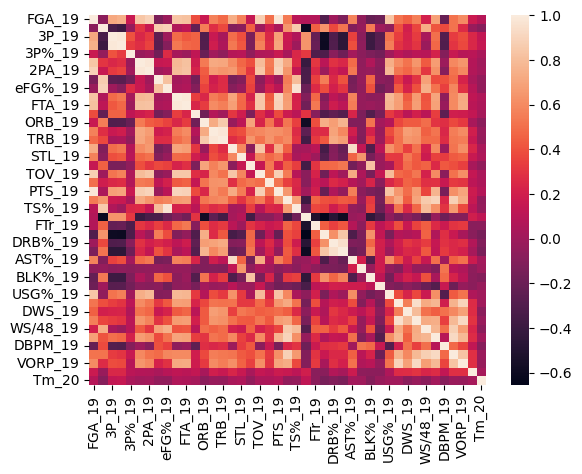

In [14]:
heatmap = df
ax = sns.heatmap(heatmap.drop({"Rk", "Player","Pos_19","Tm_19"}, axis=1).iloc[:,5:49].corr())
plt.show()

## Wykres zarobków zawodników NBA

In [15]:
df5= df.sort_values('Salary_19')

In [16]:
import plotly.express as px
fig = px.scatter(x = df5['Player'], y= [df5['Salary_19'],df5['Salary_20'],df5['Salary_21'],df5['Salary_22']])
fig.show()


## Przygotowanie Data Frame do modeli predykcyjnych

In [17]:
df.head()

,Rk,Player,Pos_19,Age_19,Tm_19,G_19,GS_19,MP_19,FG_19,FGA_19,...,Salary_21,Salary_22,Pos_Num_19,Pos_Num_20,Pos_Num_21,Pos_Num_22,Age_new_19,Age_new_20,Age_new_21,Age_new_22
0,1,Steven Adams,C,26,0,63,63,26.7,4.5,7.6,...,17073171,17926829,5,5,5,5,2,2,2,2
1,2,Bam Adebayo,PF,22,1,72,72,33.6,6.1,11.0,...,28103500,30351780,4,5,5,5,1,1,1,1
2,3,Nickeil Alexander-Walker,SG,21,2,47,1,12.6,2.1,5.7,...,3261480,5009633,2,2,2,2,1,1,1,1
3,4,Grayson Allen,SG,24,3,38,0,18.9,3.1,6.6,...,4054695,8925000,2,2,2,2,1,1,2,2
4,5,Jarrett Allen,C,21,4,70,64,26.5,4.3,6.6,...,20000000,20000000,5,5,5,5,1,1,1,1


In [18]:
df.columns.tolist()

['Rk',
 'Player',
 'Pos_19',
 'Age_19',
 'Tm_19',
 'G_19',
 'GS_19',
 'MP_19',
 'FG_19',
 'FGA_19',
 'FG%_19',
 '3P_19',
 '3PA_19',
 '3P%_19',
 '2P_19',
 '2PA_19',
 '2P%_19',
 'eFG%_19',
 'FT_19',
 'FTA_19',
 'FT%_19',
 'ORB_19',
 'DRB_19',
 'TRB_19',
 'AST_19',
 'STL_19',
 'BLK_19',
 'TOV_19',
 'PF_19',
 'PTS_19',
 'PER_19',
 'TS%_19',
 '3PAr_19',
 'FTr_19',
 'ORB%_19',
 'DRB%_19',
 'TRB%_19',
 'AST%_19',
 'STL%_19',
 'BLK%_19',
 'TOV%_19',
 'USG%_19',
 'OWS_19',
 'DWS_19',
 'WS_19',
 'WS/48_19',
 'OBPM_19',
 'DBPM_19',
 'BPM_19',
 'VORP_19',
 'Pos_20',
 'Age_20',
 'Tm_20',
 'G_20',
 'GS_20',
 'MP_20',
 'FG_20',
 'FGA_20',
 'FG%_20',
 '3P_20',
 '3PA_20',
 '3P%_20',
 '2P_20',
 '2PA_20',
 '2P%_20',
 'eFG%_20',
 'FT_20',
 'FTA_20',
 'FT%_20',
 'ORB_20',
 'DRB_20',
 'TRB_20',
 'AST_20',
 'STL_20',
 'BLK_20',
 'TOV_20',
 'PF_20',
 'PTS_20',
 'PER_20',
 'TS%_20',
 '3PAr_20',
 'FTr_20',
 'ORB%_20',
 'DRB%_20',
 'TRB%_20',
 'AST%_20',
 'STL%_20',
 'BLK%_20',
 'TOV%_20',
 'USG%_20',
 'OWS_20',

In [19]:
df2 = df[[
 'Pos_Num_19',
 'Age_new_19',
 'Tm_19',
 'G_19',
 'GS_19',
 'MP_19',
 'FG_19',
 'FGA_19',
 'FG%_19',
 '3P_19',
 '3PA_19',
 '3P%_19',
 '2P_19',
 '2PA_19',
 '2P%_19',
 'eFG%_19',
 'FT_19',
 'FTA_19',
 'FT%_19',
 'ORB_19',
 'DRB_19',
 'TRB_19',
 'AST_19',
 'STL_19',
 'BLK_19',
 'TOV_19',
 'PF_19',
 'PTS_19',
 'PER_19',
 'TS%_19',
 '3PAr_19',
 'FTr_19',
 'ORB%_19',
 'DRB%_19',
 'TRB%_19',
 'AST%_19',
 'STL%_19',
 'BLK%_19',
 'TOV%_19',
 'USG%_19',
 'OWS_19',
 'DWS_19',
 'WS_19',
 'WS/48_19',
 'OBPM_19',
 'DBPM_19',
 'BPM_19',
 'VORP_19',
 'Pos_Num_20',
 'Age_new_20',
 'Tm_20',
 'G_20',
 'GS_20',
 'MP_20',
 'FG_20',
 'FGA_20',
 'FG%_20',
 '3P_20',
 '3PA_20',
 '3P%_20',
 '2P_20',
 '2PA_20',
 '2P%_20',
 'eFG%_20',
 'FT_20',
 'FTA_20',
 'FT%_20',
 'ORB_20',
 'DRB_20',
 'TRB_20',
 'AST_20',
 'STL_20',
 'BLK_20',
 'TOV_20',
 'PF_20',
 'PTS_20',
 'PER_20',
 'TS%_20',
 '3PAr_20',
 'FTr_20',
 'ORB%_20',
 'DRB%_20',
 'TRB%_20',
 'AST%_20',
 'STL%_20',
 'BLK%_20',
 'TOV%_20',
 'USG%_20',
 'OWS_20',
 'DWS_20',
 'WS_20',
 'WS/48_20',
 'OBPM_20',
 'DBPM_20',
 'BPM_20',
 'VORP_20',
 'Pos_Num_21',
 'Age_new_21',
 'Tm_21',
 'G_21',
 'GS_21',
 'MP_21',
 'FG_21',
 'FGA_21',
 'FG%_21',
 '3P_21',
 '3PA_21',
 '3P%_21',
 '2P_21',
 '2PA_21',
 '2P%_21',
 'eFG%_21',
 'FT_21',
 'FTA_21',
 'FT%_21',
 'ORB_21',
 'DRB_21',
 'TRB_21',
 'AST_21',
 'STL_21',
 'BLK_21',
 'TOV_21',
 'PF_21',
 'PTS_21',
 'PER_21',
 'TS%_21',
 '3PAr_21',
 'FTr_21',
 'ORB%_21',
 'DRB%_21',
 'TRB%_21',
 'AST%_21',
 'STL%_21',
 'BLK%_21',
 'TOV%_21',
 'USG%_21',
 'OWS_21',
 'DWS_21',
 'WS_21',
 'WS/48_21',
 'OBPM_21',
 'DBPM_21',
 'BPM_21',
 'VORP_21',
 'Salary_22']]

In [20]:
df3 = df[[
 'Player',
 'Pos_Num_19',
 'Age_new_19',
 'Tm_19',
 'G_19',
 'GS_19',
 'MP_19',
 'FG_19',
 'FGA_19',
 'FG%_19',
 '3P_19',
 '3PA_19',
 '3P%_19',
 '2P_19',
 '2PA_19',
 '2P%_19',
 'eFG%_19',
 'FT_19',
 'FTA_19',
 'FT%_19',
 'ORB_19',
 'DRB_19',
 'TRB_19',
 'AST_19',
 'STL_19',
 'BLK_19',
 'TOV_19',
 'PF_19',
 'PTS_19',
 'PER_19',
 'TS%_19',
 '3PAr_19',
 'FTr_19',
 'ORB%_19',
 'DRB%_19',
 'TRB%_19',
 'AST%_19',
 'STL%_19',
 'BLK%_19',
 'TOV%_19',
 'USG%_19',
 'OWS_19',
 'DWS_19',
 'WS_19',
 'WS/48_19',
 'OBPM_19',
 'DBPM_19',
 'BPM_19',
 'VORP_19',
 'Pos_Num_20',
 'Age_new_20',
 'Tm_20',
 'G_20',
 'GS_20',
 'MP_20',
 'FG_20',
 'FGA_20',
 'FG%_20',
 '3P_20',
 '3PA_20',
 '3P%_20',
 '2P_20',
 '2PA_20',
 '2P%_20',
 'eFG%_20',
 'FT_20',
 'FTA_20',
 'FT%_20',
 'ORB_20',
 'DRB_20',
 'TRB_20',
 'AST_20',
 'STL_20',
 'BLK_20',
 'TOV_20',
 'PF_20',
 'PTS_20',
 'PER_20',
 'TS%_20',
 '3PAr_20',
 'FTr_20',
 'ORB%_20',
 'DRB%_20',
 'TRB%_20',
 'AST%_20',
 'STL%_20',
 'BLK%_20',
 'TOV%_20',
 'USG%_20',
 'OWS_20',
 'DWS_20',
 'WS_20',
 'WS/48_20',
 'OBPM_20',
 'DBPM_20',
 'BPM_20',
 'VORP_20',
 'Pos_Num_21',
 'Age_new_21',
 'Tm_21',
 'G_21',
 'GS_21',
 'MP_21',
 'FG_21',
 'FGA_21',
 'FG%_21',
 '3P_21',
 '3PA_21',
 '3P%_21',
 '2P_21',
 '2PA_21',
 '2P%_21',
 'eFG%_21',
 'FT_21',
 'FTA_21',
 'FT%_21',
 'ORB_21',
 'DRB_21',
 'TRB_21',
 'AST_21',
 'STL_21',
 'BLK_21',
 'TOV_21',
 'PF_21',
 'PTS_21',
 'PER_21',
 'TS%_21',
 '3PAr_21',
 'FTr_21',
 'ORB%_21',
 'DRB%_21',
 'TRB%_21',
 'AST%_21',
 'STL%_21',
 'BLK%_21',
 'TOV%_21',
 'USG%_21',
 'OWS_21',
 'DWS_21',
 'WS_21',
 'WS/48_21',
 'OBPM_21',
 'DBPM_21',
 'BPM_21',
 'VORP_21',
 'Pos_Num_22',
 'Age_new_22',
 'Tm_22',
 'G_22',
 'GS_22',
 'MP_22',
 'FG_22',
 'FGA_22',
 'FG%_22',
 '3P_22',
 '3PA_22',
 '3P%_22',
 '2P_22',
 '2PA_22',
 '2P%_22',
 'eFG%_22',
 'FT_22',
 'FTA_22',
 'FT%_22',
 'ORB_22',
 'DRB_22',
 'TRB_22',
 'AST_22',
 'STL_22',
 'BLK_22',
 'TOV_22',
 'PF_22',
 'PTS_22',
 'PER_22',
 'TS%_22',
 '3PAr_22',
 'FTr_22',
 'ORB%_22',
 'DRB%_22',
 'TRB%_22',
 'AST%_22',
 'STL%_22',
 'BLK%_22',
 'TOV%_22',
 'USG%_22',
 'OWS_22',
 'DWS_22',
 'WS_22',
 'WS/48_22',
 'OBPM_22',
 'DBPM_22',
 'BPM_22',
 'VORP_22',
 'Salary_19',
 'Salary_20',
 'Salary_21',
 'Salary_22']]

In [21]:
df2.head()

,Pos_Num_19,Age_new_19,Tm_19,G_19,GS_19,MP_19,FG_19,FGA_19,FG%_19,3P_19,...,USG%_21,OWS_21,DWS_21,WS_21,WS/48_21,OBPM_21,DBPM_21,BPM_21,VORP_21,Salary_22
0,5,2,0,63,63,26.7,4.5,7.6,0.592,0.0,...,12.0,3.8,3.0,6.8,0.163,1.0,1.0,2.0,2.0,17926829
1,4,1,1,72,72,33.6,6.1,11.0,0.557,0.0,...,25.0,3.6,3.5,7.2,0.188,1.7,2.1,3.8,2.7,30351780
2,2,1,2,47,1,12.6,2.1,5.7,0.368,1.0,...,24.1,-1.1,1.1,0.1,0.003,-1.8,-1.1,-2.9,-0.3,5009633
3,2,1,3,38,0,18.9,3.1,6.6,0.466,1.5,...,15.2,2.8,1.4,4.2,0.110,0.6,-0.2,0.4,1.1,8925000
4,5,1,4,70,64,26.5,4.3,6.6,0.649,0.0,...,18.1,5.4,3.0,8.5,0.224,2.7,1.2,3.9,2.7,20000000


In [22]:
# Uzupełnianie wartości Nan medianami

for column in df2[['FG%_19', '3P%_19', '2P%_19', 'FT%_19', 'FG%_20', '3P%_20', '2P%_20', 'FT%_20', 'FG%_21', '3P%_21', '2P%_21', 'FT%_21']]:
    median_value = df2[column].median()
    df2[column].fillna(median_value, inplace=True)

<ipython-input-22-7512ccbd3565>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-22-7512ccbd3565>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-22-7512ccbd3565>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-22-7512ccbd3565>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pand

In [23]:
df_model = df2
df_model

,Pos_Num_19,Age_new_19,Tm_19,G_19,GS_19,MP_19,FG_19,FGA_19,FG%_19,3P_19,...,USG%_21,OWS_21,DWS_21,WS_21,WS/48_21,OBPM_21,DBPM_21,BPM_21,VORP_21,Salary_22
0,5,2,0,63,63,26.7,4.5,7.6,0.592,0.0,...,12.0,3.8,3.0,6.8,0.163,1.0,1.0,2.0,2.0,17926829
1,4,1,1,72,72,33.6,6.1,11.0,0.557,0.0,...,25.0,3.6,3.5,7.2,0.188,1.7,2.1,3.8,2.7,30351780
2,2,1,2,47,1,12.6,2.1,5.7,0.368,1.0,...,24.1,-1.1,1.1,0.1,0.003,-1.8,-1.1,-2.9,-0.3,5009633
3,2,1,3,38,0,18.9,3.1,6.6,0.466,1.5,...,15.2,2.8,1.4,4.2,0.110,0.6,-0.2,0.4,1.1,8925000
4,5,1,4,70,64,26.5,4.3,6.6,0.649,0.0,...,18.1,5.4,3.0,8.5,0.224,2.7,1.2,3.9,2.7,20000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,1,2,21,73,5,21.5,2.6,5.6,0.462,0.6,...,10.3,2.2,1.5,3.6,0.121,-0.2,2.4,2.2,1.6,7804878
284,4,2,7,64,16,24.9,4.2,9.4,0.448,1.2,...,17.4,0.9,1.3,2.2,0.126,0.1,2.1,2.2,0.9,8000000
285,1,1,24,60,60,35.3,9.1,20.8,0.437,3.4,...,34.4,9.0,1.0,10.0,0.181,7.1,-2.0,5.2,4.8,37096500
286,5,2,13,58,39,23.1,4.3,8.3,0.524,0.3,...,15.9,0.9,0.2,1.1,0.143,-1.2,-1.0,-2.1,0.0,743922


# Dzielenie na zbiory treningowe, testowe i walidacyjne

In [25]:
y = df_model.pop('Salary_22')
X = df_model

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

# Skalowanie danych

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)


In [29]:
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

# Importy bibliotek do modeli predykcyjnych

In [50]:

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
from tensorflow.keras import layers
from math import sqrt

# Modele regresji liniowej

In [31]:
# Tworzymy model regresji Lasso

model_lasso = linear_model.Lasso(alpha=0.1)
model_lasso.fit(X_train_scaled, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.127e+15, tolerance: 2.764e+12



Lasso(alpha=0.1)

In [32]:
model_lasso.score(X_train_scaled,y_train)

0.9184819365001978

In [52]:
model_lasso.score(X_test_scaled,y_test)

0.44238287587757563

In [33]:
y_pred = model_lasso.predict(X_test_scaled)

In [51]:

mse = mean_squared_error(y_test, y_pred)
sqrt(mse)

9881647.459026596

In [35]:
mean_absolute_percentage_error(y_test, y_pred)

1.0896497091306747

In [36]:
# Tworzymy model regresji Elastic Net
elastic_net_model = ElasticNet(alpha=0.1, l1_ratio=0.5)

# Uczenie modelu na danych treningowych
elastic_net_model.fit(X_train_scaled, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.911e+15, tolerance: 2.764e+12



ElasticNet(alpha=0.1)

In [37]:
elastic_net_model.score(X_train_scaled,y_train)

0.8792304464363013

In [38]:
elastic_net_model.score(X_test_scaled,y_test)

0.6354849929143698

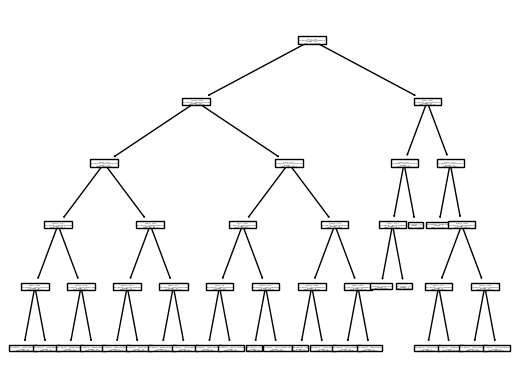

In [40]:
# Tworzenie regresyjnego drzewa dezycyjnego

model_tree = DecisionTreeRegressor(max_depth=5, min_samples_split=3)
model_tree.fit(X_train_scaled,y_train)
tree.plot_tree(model_tree)
plt.savefig("tre")

In [41]:
model_tree.score(X_test_scaled,y_test)

0.6767339715087775

# Szukanie hiperparamtertów dla drzewa decyzyjnego za pomocą funkcji GridSearch

In [42]:
decision = DecisionTreeRegressor()
parameters = {'max_depth':(3, 5, 8), 'min_samples_split':[1, 3, 5, 8, 10, 13, 16, 20]}
grid_model = GridSearchCV(decision, parameters)
grid_model.fit(X_train_scaled,y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning:


15 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 1247, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _vali

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': (3, 5, 8),
                         'min_samples_split': [1, 3, 5, 8, 10, 13, 16, 20]})

In [43]:
grid_model.best_params_

{'max_depth': 3, 'min_samples_split': 20}

In [44]:
grid_model.cv_results_

{'mean_fit_time': array([0.00321312, 0.00931859, 0.00905218, 0.00838189, 0.00840836,
        0.01275477, 0.01856456, 0.01834903, 0.00608811, 0.02392716,
        0.01651416, 0.01362581, 0.01259189, 0.01266646, 0.0144701 ,
        0.01572165, 0.00076098, 0.01916027, 0.01695557, 0.02033243,
        0.01858387, 0.02008586, 0.02124643, 0.01748013]),
 'std_fit_time': array([0.00272916, 0.00102919, 0.00110036, 0.00010864, 0.00018778,
        0.00599218, 0.00204873, 0.00446697, 0.00487165, 0.01442686,
        0.00343108, 0.0014353 , 0.00059221, 0.00075905, 0.00336926,
        0.00325841, 0.00016213, 0.00319751, 0.00093772, 0.00648325,
        0.00561646, 0.00567735, 0.00711531, 0.00517126]),
 'mean_score_time': array([0.        , 0.00113564, 0.00139627, 0.00110927, 0.00107279,
        0.00121803, 0.00484033, 0.00218253, 0.        , 0.001614  ,
        0.00136471, 0.00135059, 0.00229053, 0.00128527, 0.00127583,
        0.00143433, 0.        , 0.00152206, 0.00138712, 0.00276532,
        0.001388

In [45]:
grid_model.best_score_

0.6160190523537614

# Tworzenie sieci neuronowej

In [53]:
model_neuro = tf.keras.Sequential()
model_neuro.add(layers.Dense(3000, activation='relu'))  # Warstwa wejściowa z 64 neuronami i funkcją aktywacji ReLU
# model_neuro.add(layers.Dense(2500, activation='relu'))  # Warstwa ukryta z 128 neuronami i funkcją aktywacji ReLU
model_neuro.add(layers.Dense(1))

In [54]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.2)
model_neuro.compile(loss='mean_absolute_error',  # Funkcja straty dla problemu regresji
              optimizer= optimizer,  # Optymalizator (algorytm aktualizacji wag)
              metrics=['mae'])  # Metryka, którą chcemy monitorować podczas trenowania (średni błąd bezwzględny)


In [57]:
history = model_neuro.fit(X_train_scaled, y_train, epochs=100, batch_size=2000, validation_data=(X_val_scaled, y_val))

Epoch 1/100
1/1 [==============================] - 0s 84ms/step - loss: 956753.0625 - mae: 956753.0625 - val_loss: 5225791.0000 - val_mae: 5225791.0000
Epoch 2/100
1/1 [==============================] - 0s 93ms/step - loss: 947620.3750 - mae: 947620.3750 - val_loss: 5219132.0000 - val_mae: 5219132.0000
Epoch 3/100
1/1 [==============================] - 0s 84ms/step - loss: 955308.1250 - mae: 955308.1250 - val_loss: 5226286.0000 - val_mae: 5226286.0000
Epoch 4/100
1/1 [==============================] - 0s 94ms/step - loss: 951349.8125 - mae: 951349.8125 - val_loss: 5222933.0000 - val_mae: 5222933.0000
Epoch 5/100
1/1 [==============================] - 0s 87ms/step - loss: 944482.9375 - mae: 944482.9375 - val_loss: 5233112.5000 - val_mae: 5233112.5000
Epoch 6/100
1/1 [==============================] - 0s 93ms/step - loss: 948617.6875 - mae: 948617.6875 - val_loss: 5235035.0000 - val_mae: 5235035.0000
Epoch 7/100
1/1 [==============================] - 0s 88ms/step - loss: 942357.8125 - ma

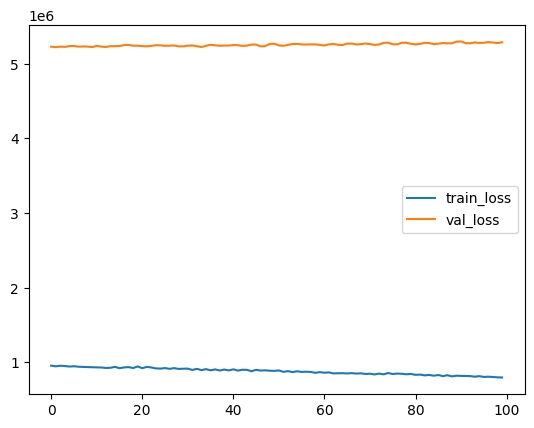

In [58]:
plt.plot(history.history["loss"], label="train_loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.legend()
plt.show()

# Podsumowanie wyników